In [1]:
# Reading raster data
import rasterio
from rasterio.plot import show

# Used to comebine the bands
import numpy as np

# Plotting libaries 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib_scalebar.scalebar import ScaleBar
import os


/home/vincent/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# img = rasterio.open('MyImageExports/imageToDriveExample_of0.tif')

def extract_number(filename):
    # Extract the leading number from the filename
    return int(filename.split('LE')[0])

# Sort the folder list based on the extracted number

path = 'MyImageExports/'
folder = os.listdir(path)
folder.sort(key = extract_number)
# for x in folder:
#     print(x)


In [3]:
list = []
for img in folder:
    img_path = os.path.join(path, img)
    img = rasterio.open(img_path)
    print(img_path)
    band1 = img.read(1)
    band2 = img.read(2)
    band3 = img.read(3)

    xmin, ymin, xmax, ymax = img.bounds

    rgb = np.stack([band1, band2, band3], axis=-1)
    from rasterio.plot import adjust_band
    rgb_norm = adjust_band(rgb) 
    list.append(rgb_norm)

: 

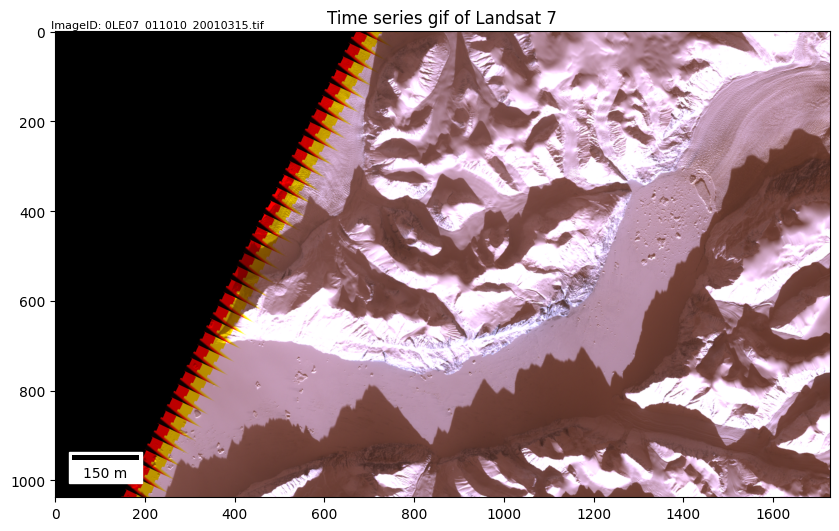

MovieWriter ffmpeg unavailable; using Pillow instead.


In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
# mutliplying by 3 so that image is a bit lighter:
ax.imshow(rgb_norm, extent = [xmin, xmax, ymin, ymax]); 

# Creates the animation
im = ax.imshow(list[0], animated=True, )
# Scale legend for each image
ax.add_artist(ScaleBar(dx = 1, border_pad = 1, location = 'lower left', length_fraction = 0.1))
# Init text for image
text = ax.text(-10, -10, '', fontsize=8, color='black')

def update(i):
    im.set_array(list[i])
    id = folder[i]
    text.set_text(f'ImageID: {id}')

    return im, text


plt.title('Time series gif of Landsat 7')

# Create the animation object
animation_fig = animation.FuncAnimation(fig, update, frames=len(list), interval=100, blit=True,repeat_delay=10,)
# Show the animation
plt.show()

animation_fig.save("animated_GMM.gif")
